In [ ]:
import requests
import os

def download_file(url, path):
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(path, 'wb') as f:
            f.write(response.raw.read())

# 저장할 경로 설정
save_dir = './coco'
os.makedirs(save_dir, exist_ok=True)

# 파일 URL
images_url = "http://images.cocodataset.org/zips/val2017.zip"
annotations_url = "http://images.cocodataset.org/annotations/annotations_trainval2017.zip"

# 파일 저장 경로
images_zip_path = os.path.join(save_dir, 'val2017.zip')
annotations_zip_path = os.path.join(save_dir, 'annotations_trainval2017.zip')

# 파일 다운로드
download_file(images_url, images_zip_path)
download_file(annotations_url, annotations_zip_path)

print("다운로드 완료!")


다운로드 완료!


In [ ]:
!unzip ./coco/val2017.zip -d ./coco
!unzip ./coco/annotations_trainval2017.zip -d ./coco/val2017

Archive:  ./coco/annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [ ]:
!pip install pycocotools numpy

In [ ]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import cv2
import numpy as np

# COCO 데이터셋 파일 경로
dataDir = './coco'
dataType = 'val2017'
annFile = f'{dataDir}/{dataType}/annotations/instances_{dataType}.json'

# COCO 객체 초기화
coco = COCO(annFile)

# 데이터셋에서 카테고리 ID 가져오기
catIds = coco.getCatIds(catNms=['person'])  # 예를 들어 'person' 카테고리
imgIds = coco.getImgIds(catIds=catIds)

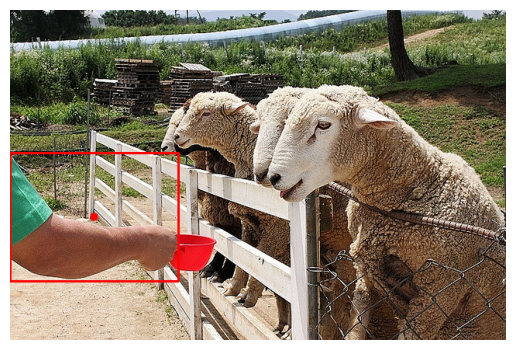

In [ ]:


# 이미지 ID를 사용하여 이미지 정보 가져오기
img = coco.loadImgs(imgIds[np.random.randint(0, len(imgIds))])[0]

# 이미지 로드 및 표시
img_path = f'{dataDir}/{dataType}/{img["file_name"]}'
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 해당 이미지의 모든 주석 가져오기
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
annotations = coco.loadAnns(annIds)

# 주석에 따라 이미지에 바운딩 박스 그리기
for ann in annotations:
    bbox = ann['bbox']
    x, y, w, h = bbox
    cv2.rectangle(image, (int(x), int(y)), (int(x+w), int(y+h)), (255, 0, 0), 2)

    # 중심점을 이미지에 표시 (예: 빨간색 원으로 표시)
    center_x = int(x + w / 2)
    center_y = int(y + h / 2)
    cv2.circle(image, (center_x, center_y), 5, (255, 0, 0), -1)

# 이미지 표시
plt.imshow(image)
plt.axis('off')
plt.show()


In [ ]:
annotations

[{'segmentation': [[640.0,
    181.19,
    632.08,
    175.25,
    620.2,
    172.87,
    601.19,
    170.5,
    596.44,
    169.31,
    590.5,
    163.37,
    582.18,
    155.05,
    575.05,
    152.67,
    572.67,
    128.91,
    584.55,
    109.9,
    592.87,
    87.33,
    589.31,
    37.43,
    573.86,
    13.66,
    560.79,
    7.72,
    527.52,
    5.35,
    496.63,
    8.91,
    475.25,
    24.36,
    474.06,
    37.43,
    474.06,
    42.18,
    468.12,
    61.19,
    463.37,
    83.76,
    463.37,
    111.09,
    464.55,
    126.53,
    465.74,
    145.54,
    466.93,
    153.86,
    438.42,
    158.61,
    403.96,
    182.38,
    390.89,
    212.08,
    402.77,
    233.47,
    474.06,
    238.22,
    550.1,
    245.35,
    591.68,
    271.49,
    605.94,
    304.75,
    605.94,
    321.39,
    640.0,
    317.82],
   [338.61,
    261.98,
    274.46,
    300.0,
    242.38,
    316.63,
    225.74,
    317.82,
    203.17,
    314.26,
    172.28,
    305.94,
    161.58,
    308.3